In [1]:
from graphviz import Digraph

In [2]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

('A', 'B', 'C', 'D', 'E')


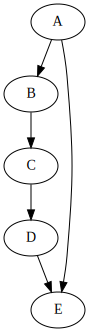

In [26]:
# https://tinyurl.com/2p82uuvz

class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        self.visited = set() # node's we've already checked

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    def edge(self, src, dst):
        # automatically add missing nodes
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])
    def _repr_svg_(self):
        # draw nodes+edges, non-recursively!
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def find(self, src, dst):
        # CLEAR THE LIST
        self.visited.clear()
        # DO THE RECURSIVE SEARCH
        return self.nodes[src].find(self.nodes[dst])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        
    def __repr__(self):
        return self.name
    
    def find(self, dst):
        #print("CHECK", self.name)
        self.graph.visited.add(self)
        if self == dst:
            return (self.name,)
        for child in self.children:
            if child not in self.graph.visited:
                path = child.find(dst)
                if path != None:
                    return (self.name,) + path
        return None

g = example(2)
print(g.find("A", "E"))
#print(g.find("A", "A"))
# want to return something like:
# (A,E) OR (A,B,C,D,E)
g